In [28]:
import numpy as np
import tensorflow as tf
import gym
from gym import wrappers
import time
import matplotlib.pyplot as plt
import numpy.random as random

In [154]:
batch_size = 5
action_size = 3
state_size = 2
graph = tf.Graph()
gamma = 0.5

with graph.as_default():
    tf_ob_states = tf.placeholder(tf.float32, shape=(batch_size, state_size))
    tf_next_states = tf.placeholder(tf.float32, shape=(batch_size, state_size))
    tf_ob_rewards = tf.placeholder(tf.float32, shape=(batch_size, 1))
    tf_cur_state = tf.placeholder(tf.float32, shape=(1, state_size))
    tf_actions = tf.placeholder(tf.int32, shape=(batch_size, 1)) #enum for gather trick

    weights = tf.Variable(tf.truncated_normal([state_size, action_size]))
    biases = tf.Variable(tf.zeros([action_size]))
    
    tf_q_rt = tf.gather(tf.reshape(tf.matmul(tf_ob_states, weights) + biases, [batch_size*action_size]), tf_actions)
    tf_q_rt_1 = tf.reduce_max(tf.matmul(tf_next_states, weights) + biases)
    action = tf.argmax(tf.matmul(tf_cur_state, weights) + biases, 1)
    loss = tf.reduce_mean(tf.pow((tf_ob_rewards + gamma * tf_q_rt_1) - tf_q_rt,2)/2.0)
    optimizer = tf.train.GradientDescentOptimizer(0.8).minimize(loss)
    
#saver = tf.train.Saver([weights, biases])

In [155]:
episode_count = 300
env = gym.make('MountainCar-v0')
outdir = './single_layer_SGD_results'
#env = wrappers.Monitor(env, directory=outdir, force=True)
total_rew = 0
total_loss = 0
total_q_rew = 0
rewards_hist = []
loss_hist = []
q_rew_hist = []

def exp_exp_action(curr_action):
    epsilon = 0.1
    if random.random(1)[0] > epsilon:
        return curr_action
    else:
        return random.randint(0,3)

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    #saver.restore(session, 'batch-5')
    train = True
    for i in range(episode_count):
        ob = env.reset()
        prev_t_states = []
        prev_actions = []
        prev_t1_states = []
        prev_t_rewards = []
        while True:
            if total_rew < -500:
                rewards_hist.append(total_rew)
                loss_hist.append(total_loss)
                q_rew_hist.append(total_q_rew)
                total_rew = 0
                total_loss = 0
                total_q_rew = 0
                #tf.initialize_all_variables().run()
                break
            env.render()
            prev_t_states.append(ob)
            next_action = exp_exp_action(session.run([action], feed_dict={tf_cur_state: ob.reshape((1,2))})[0][0])
            prev_actions.append(next_action)
            ob, reward, done, _ = env.step(next_action)
            total_rew += reward
            prev_t_rewards.append([reward])
            prev_t1_states.append(ob)
            if done:
                rewards_hist.append(total_rew)
                loss_hist.append(total_loss)
                total_rew=0
                total_loss=0
                break
            if len(prev_t_states) == batch_size:
                reshaped_actions = np.array([(pos*action_size)+i for pos,i in enumerate(prev_actions)]).reshape((batch_size, 1))
                feed_dict = {tf_ob_states: prev_t_states, tf_ob_rewards: prev_t_rewards,
                             tf_next_states: prev_t1_states, tf_actions: reshaped_actions}
                _, l, q_rewards = session.run([optimizer, loss, tf_q_rt], feed_dict=feed_dict)
                total_loss += l
                prev_t_states = []
                prev_actions = []
                prev_t1_states = []
                prev_t_rewards = []
                
    env.close()
    #saved_path = saver.save(session, 'batch-5')

[2017-03-05 07:38:37,365] Making new env: MountainCar-v0


ArgumentError: argument 2: <class 'TypeError'>: wrong type

In [117]:
(env.close())

In [120]:
with tf.Session(graph=graph) as session:
    print(tf.gather(tf.reshape([[1,2,3], [1,2,3]],[6]),[[0],[3]]).eval())

array([[1]])

In [160]:
gym.upload(outdir, api_key="sk_xkrNZodR7eNmb1cI0yQ5g")

Error: Still have an open monitor on MountainCar-v0, MountainCar-v0, MountainCar-v0, MountainCar-v0, MountainCar-v0, MountainCar-v0. You must run 'env.close()' before uploading.

In [65]:
print(env.step(action))

(array([-0.50622857, -0.01527083]), -1.0, False, {})


In [85]:
env.observation_space.sample()

array([-0.64926194, -0.02723378])

In [19]:
env.close()

In [183]:
env = gym.make('MountainCar-v0')
env.spec.tags['wrapper_config.TimeLimit.max_episode_steps']

[2017-01-28 06:06:21,328] Making new env: MountainCar-v0


200

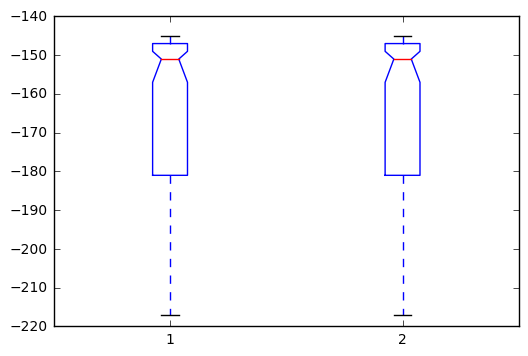

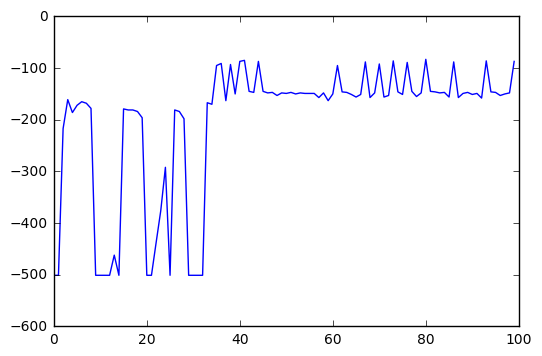

In [208]:
#Batch Size 1
plt.boxplot([rewards_hist], showfliers=False, notch=True, bootstrap=1000)
plt.show()
plt.plot(rewards_hist)
plt.show()

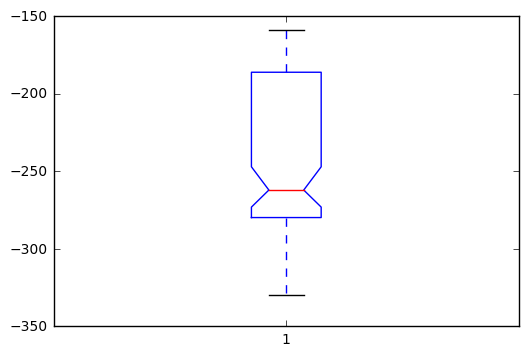

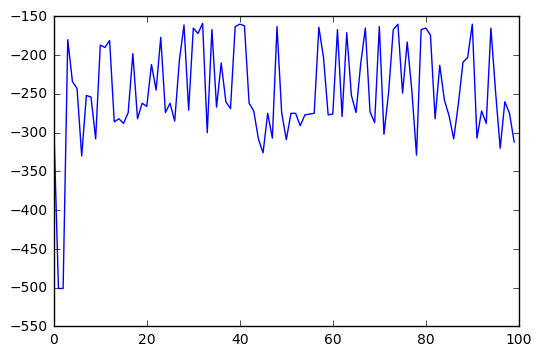

In [213]:
#Batch Size 1
plt.boxplot([rewards_hist], showfliers=False, notch=True, bootstrap=1000)
plt.show()
plt.plot(rewards_hist)
plt.show()

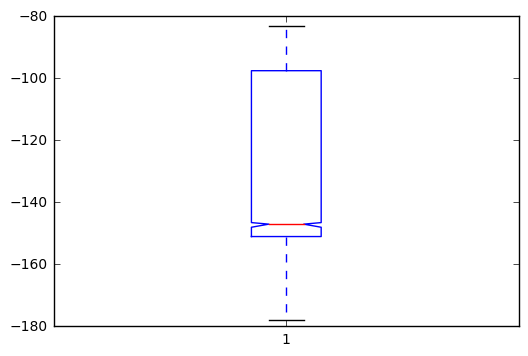

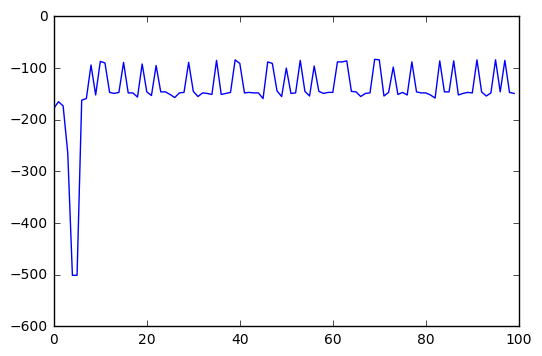

In [216]:
#Batch Size 5
plt.boxplot([rewards_hist], showfliers=False, notch=True, bootstrap=1000)
plt.show()
plt.plot(rewards_hist)
plt.show()

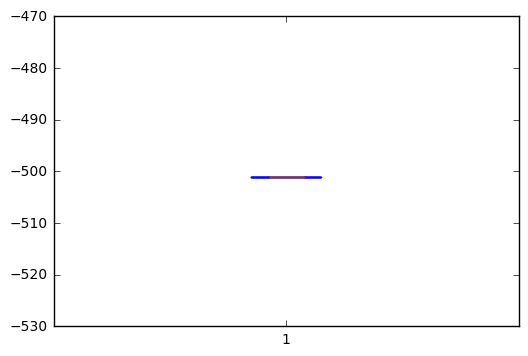

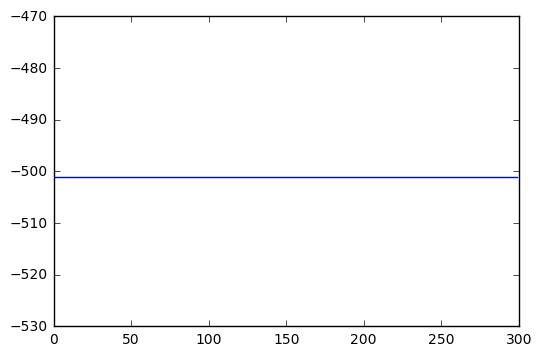

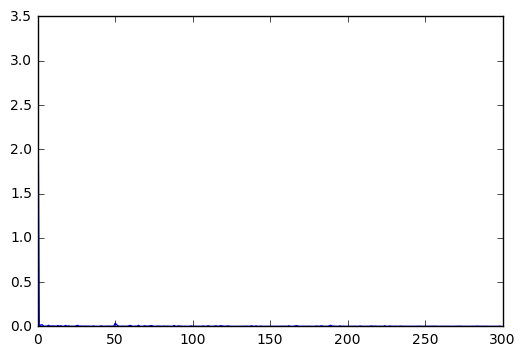

In [153]:
#Batch Size 5 - Qlearning - gamma 0.5
plt.boxplot([rewards_hist], showfliers=False, notch=True, bootstrap=1000)
plt.show()
plt.plot(rewards_hist)
plt.show()
plt.plot(loss_hist)
plt.show()

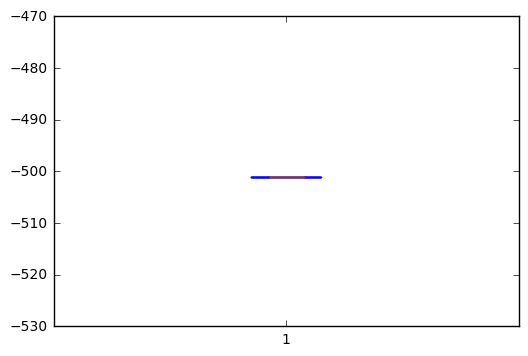

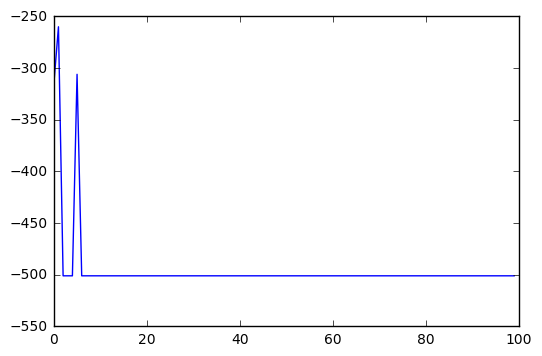

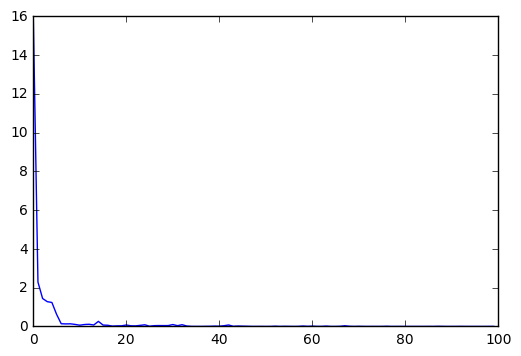

In [148]:
#Batch Size 5 - Qlearning - gamma 0.8
plt.boxplot([rewards_hist], showfliers=False, notch=True, bootstrap=1000)
plt.show()
plt.plot(rewards_hist)
plt.show()
plt.plot(loss_hist)
plt.show()

In [145]:
len(loss_hist)

0